In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = sns.load_dataset('titanic')


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
missing = df.isnull().sum()

<Figure size 1200x600 with 0 Axes>

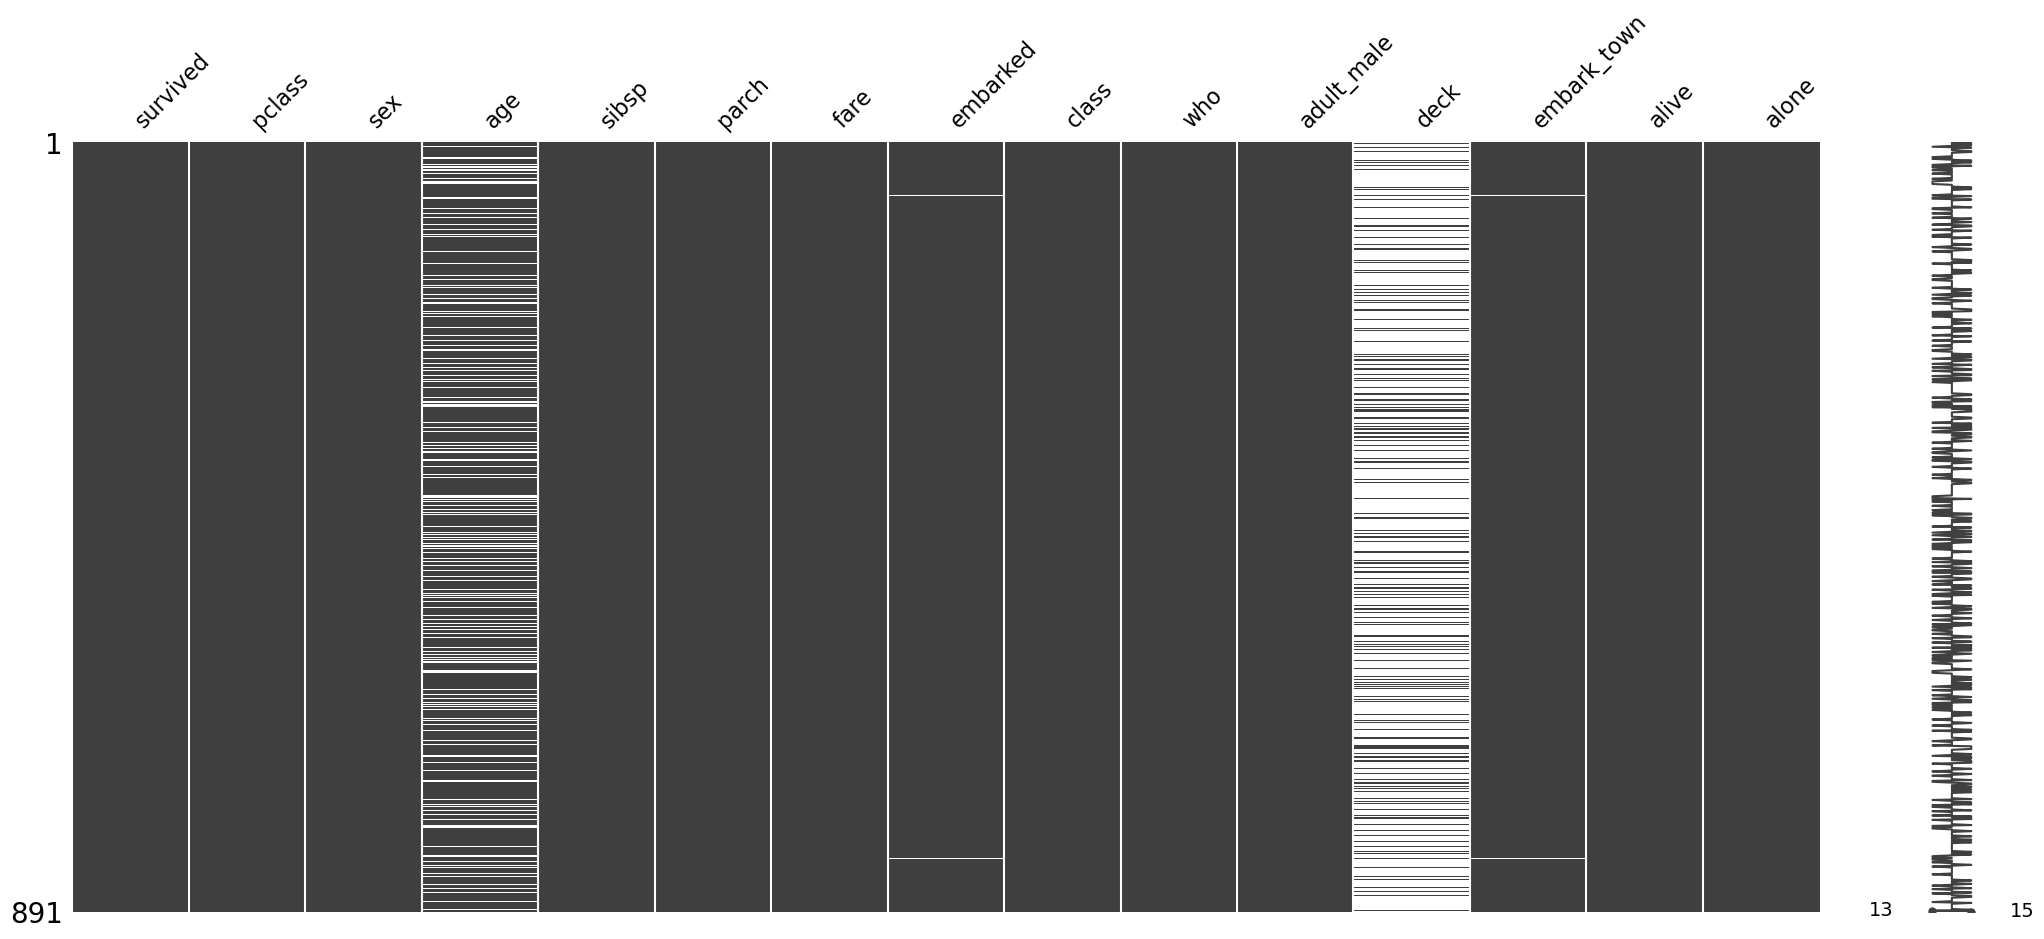

In [20]:
import missingno as msno
plt.figure(figsize=(12,6))
msno.matrix(df)
plt.show()

<Axes: >

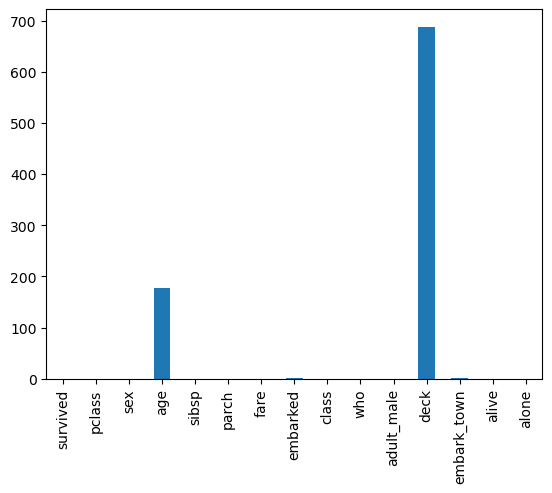

In [24]:
missing.plot(kind="bar")

In [32]:
lost_data = (df.dropna().shape[0]/df.shape[0])*100
print(f" Performing the dropna will result in only {round(lost_data,2)} % remaining for use. ")

 Performing the dropna will result in only 20.43 % remaining for use. 


In [33]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


<Axes: xlabel='age', ylabel='Count'>

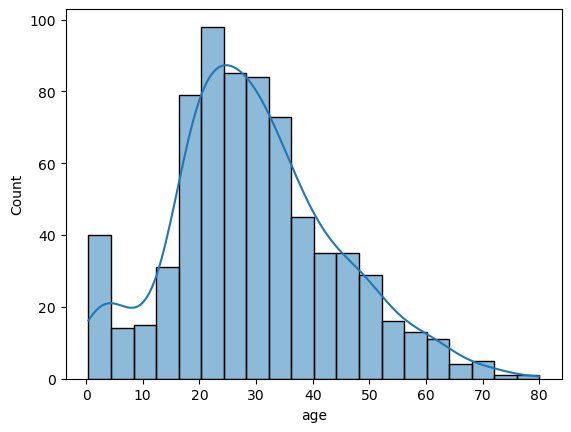

In [34]:
sns.histplot(df['age'],kde=True)

In [39]:
df['age_mean'] = df['age'].fillna(df['age'].mean())
df['age_median'] = df['age'].fillna(df['age'].median())
df['age_mode'] = df['age'].fillna(df['age'].mode()[0])

df[['age_mean','age_median','age_mode','age']]

,age_mean,age_median,age_mode,age
0,22.000000,22.0,22.0,22.0
1,38.000000,38.0,38.0,38.0
2,26.000000,26.0,26.0,26.0
3,35.000000,35.0,35.0,35.0
4,35.000000,35.0,35.0,35.0
...,...,...,...,...
886,27.000000,27.0,27.0,27.0
887,19.000000,19.0,19.0,19.0
888,29.699118,28.0,24.0,NaN
889,26.000000,26.0,26.0,26.0


In [ ]:
df['age'].fillna(method='')

24.0

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
age_reshaped = df[['age']]
df['age_simpleimputer'] = imputer.fit_transform(age_reshaped)
df[['age_simpleimputer','age']]


,age_simpleimputer,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,24.0,NaN
889,26.0,26.0


In [51]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_mean', 'age_median', 'age_mode',
       'age_simpleimputer'],
      dtype='object')

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [53]:
# iterative imputer and knn imputer
# https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#h-missing-completely-at-random-mcar

## Handling Imbalanced Dataset